<a href="https://colab.research.google.com/github/vishva2410/Anomoly-Detection-using-DBscan/blob/main/DBSCAN(anomoly_detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
df = pd.read_csv('all_stocks_5yr.csv')
df.head(2)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL


In [5]:
df['date']=pd.to_datetime(df['date'])

In [6]:
le = LabelEncoder()
df['Name']=le.fit_transform(df['Name'])

In [7]:
se = StandardScaler()
df[['open','high','low','close','volume','Name']] = se.fit_transform(df[['open','high','low','close','volume','Name']])

In [8]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,-0.763718,-0.764928,-0.766252,-0.766736,0.203274,-1.634460
1,2013-02-11,-0.765285,-0.765877,-0.769506,-0.769262,0.234401,-1.634460
2,2013-02-12,-0.769117,-0.770193,-0.770913,-0.770916,0.184807,-1.634460
3,2013-02-13,-0.770423,-0.766481,-0.769594,-0.767520,0.324764,-1.634460
4,2013-02-14,-0.764850,-0.766309,-0.779178,-0.773355,1.743056,-1.634460
...,...,...,...,...,...,...,...
87228,2013-12-13,-0.677720,-0.678559,-0.676740,-0.677856,-0.266189,1.817591
87229,2013-12-16,-0.677328,-0.676876,-0.675729,-0.675069,-0.250719,1.817591
87230,2013-12-17,-0.675107,-0.677048,-0.676476,-0.676942,-0.254271,1.817591
87231,2013-12-18,-0.676370,-0.674200,-0.674982,-0.672326,-0.189905,1.817591


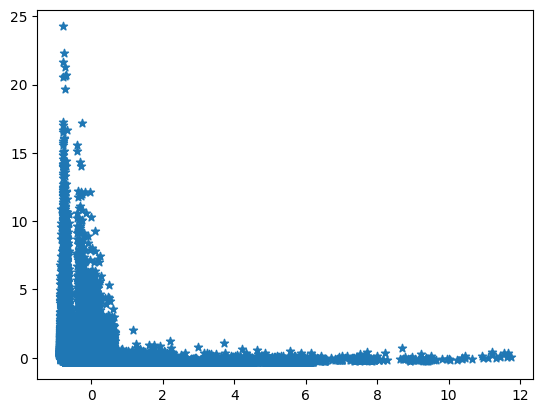

<Figure size 800x500 with 0 Axes>

In [9]:
plt.scatter(df['close'],df['volume'],marker='*')
plt.figure(figsize=(8, 5))
plt.show()

In [11]:
df['price_change'] = df['close'] - df['open']  # Daily price change
df['volatility'] = df['high'] - df['low']  # Daily volatility
df['rolling_std'] = df['close'].rolling(window=10).std()

In [12]:
features = ['open', 'high', 'low', 'close', 'volume', 'Name', 'price_change', 'volatility', 'rolling_std']
x = df[features]

In [13]:
X_scaled = se.fit_transform(x)

In [14]:
df.isnull().sum()

,0
date,0
open,1
high,1
low,1
close,0
volume,0
Name,0
price_change,1
volatility,1
rolling_std,9


In [15]:
df['open']= df['open'].fillna(df['open'].mean()).mean()
df['price_change'] = df['price_change'].fillna(df['price_change'].mean()).mean()
df['volatility']= df['volatility'].fillna(df['volatility'].mean()).mean()
df['rolling_std']= df['rolling_std'].fillna(df['rolling_std'].mean()).mean()

In [16]:
df = df.dropna()

In [17]:
model = DBSCAN(eps=0.5, min_samples=4)
model.fit(df[features])

DBSCAN(min_samples=4)

In [21]:
pred = model.labels_

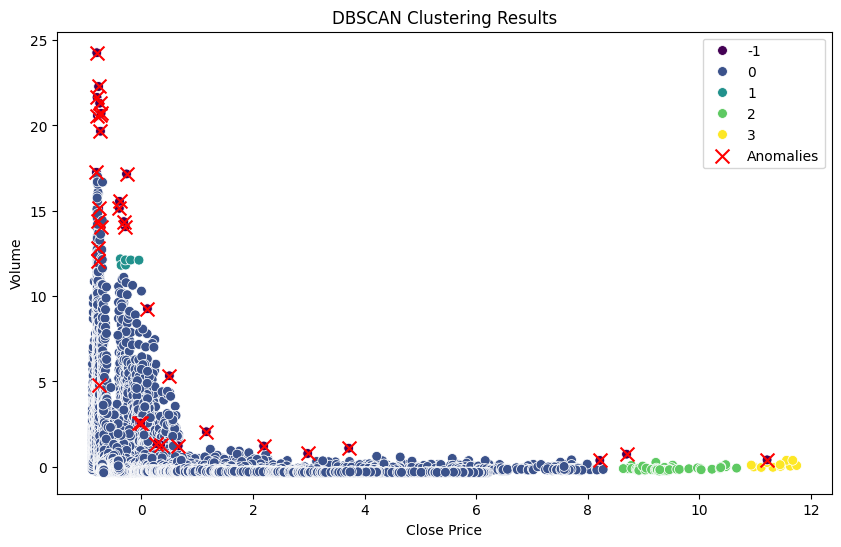

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['close'], y=df['volume'], hue=pred, palette='viridis', s=50)
anomalies = df[pred == -1]
plt.scatter(anomalies['close'], anomalies['volume'], color='red', marker='x', s=100, label='Anomalies')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.legend()
plt.show()

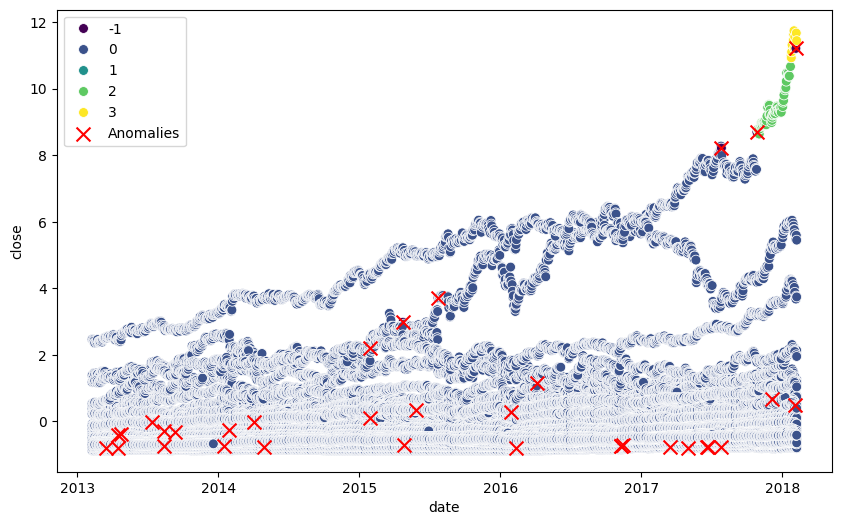

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['date'], y=df['close'], hue=pred, palette='viridis', s=50)
anomalies = df[pred == -1]
plt.scatter(anomalies['date'], anomalies['close'], color='red', marker='x', s=100, label='Anomalies')
plt.legend()
plt.show()

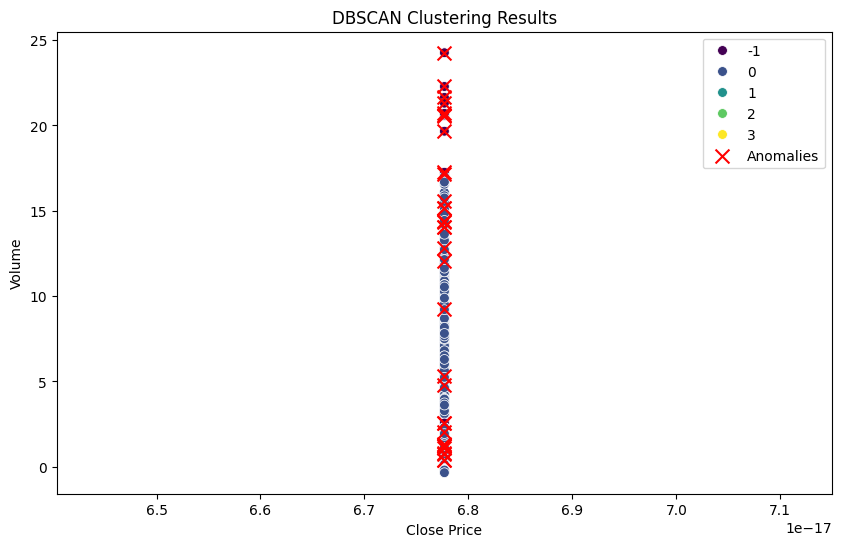

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['open'], y=df['volume'], hue=pred, palette='viridis', s=50)
anomalies = df[pred == -1]
plt.scatter(anomalies['open'], anomalies['volume'], color='red', marker='x', s=100, label='Anomalies')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.legend()
plt.show()